### 1. Importar las liberías necesarias 🔧

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### 2. Cargar y preparar los datos 📥

In [ ]:
# Cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles (de 0–255 a 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar para agregar el canal (1, porque es blanco y negro)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding de las etiquetas (ej: 3 → [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 3. Construir la red neuronal 🧱

In [ ]:
model = Sequential([
    Input(shape=(28,28,1)),
    # Capa convolucional: 32 filtros, 3x3, activación ReLU
    Conv2D(32, kernel_size=(3,3), activation='relu'),

    # Max pooling: reduce tamaño 2x2
    MaxPooling2D(pool_size=(2,2)),

    # Dropout para evitar overfitting
    Dropout(0.25),

    # Conv2D adicional
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Aplanar para Dense
    Flatten(),

    # Capa totalmente conectada
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Capa de salida: 10 neuronas, una por clase
    Dense(10, activation='softmax')
])

### 4. Compilar el modelo ⚙️

In [ ]:
model.compile(
    loss='categorical_crossentropy',      # Función de pérdida para clasificación multiclase
    optimizer='adam',                     # Optimizador eficiente
    metrics=['accuracy']                  # Métrica a monitorear
)

### 5. Entrenar el modelo 🚀

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.7994 - loss: 0.6136 - val_accuracy: 0.9815 - val_loss: 0.0624
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9628 - loss: 0.1231 - val_accuracy: 0.9873 - val_loss: 0.0420
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9718 - loss: 0.0923 - val_accuracy: 0.9883 - val_loss: 0.0398
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9775 - loss: 0.0749 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9804 - loss: 0.0656 - val_accuracy: 0.9910 - val_loss: 0.0332


### 6. Evaluar el modelo ✅

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0370
Precisión en test: 0.9899


### Cargar una imagen para utilizar el modelo 💻

**Paso 1: Subir imagen.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving numero.png to numero (1).png


**Paso 2: Cargar y preprocesar imagen.**

In [ ]:
from PIL import Image
import numpy as np

# Cargar la imagen (ajusta el nombre del archivo si es distinto)
img = Image.open("numero.png").convert('L')  # 'L' convierte a escala de grises

# Redimensionar a 28x28 (como en MNIST)
img = img.resize((28, 28))

# Invertir colores si es fondo blanco y número negro (MNIST es fondo negro y número blanco)
img = np.invert(img)

# Convertir a numpy array y normalizar
img_array = np.array(img) / 255.0

# Reshape a (1, 28, 28, 1) — para que coincida con el input del modelo
img_array = img_array.reshape(1, 28, 28, 1)

**Paso 3: Hacer la predicción.**

In [ ]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

print(f"El modelo predice que el número es: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
El modelo predice que el número es: 7


**Para ver la imagen**

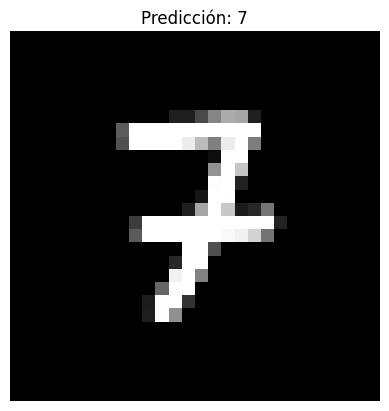

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicción: {predicted_class}")
plt.axis('off')
plt.show()